In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "csecindurasritl" # username from the json file
os.environ['KAGGLE_KEY'] = "1bef7ec9c06ad05235c7f82683de902f" # key from the json fil
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia


100% 2.05G/2.06G [01:49<00:00, 24.3MB/s]
100% 2.06G/2.06G [01:49<00:00, 20.1MB/s]


In [3]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

Procedure for CNN
- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

Populating the interactive namespace from numpy and matplotlib


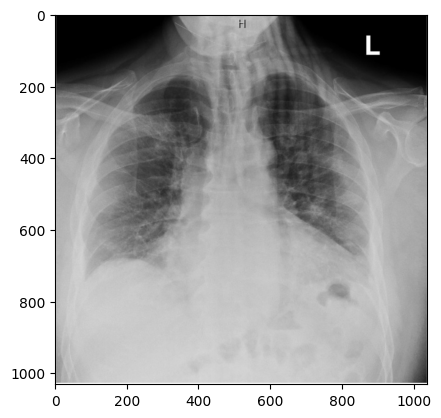

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Data/train/COVID19/COVID19(10).jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
img.shape

(1031, 1038, 3)

Populating the interactive namespace from numpy and matplotlib


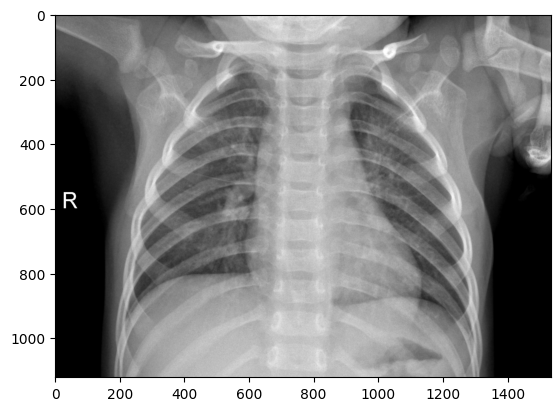

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Data/train/NORMAL/NORMAL(1006).jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
img.shape

(1121, 1534, 3)

# Load the libraries and add variation

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, Flatten, MaxPooling2D,Activation
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [23]:
img_width, img_height = 150,150
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_samples =100
nb_validation_samples =100
epochs =20
batch_size= 32

In [24]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [25]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator ( rescale=1. /255)


In [26]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), class_mode='categorical', batch_size=batch_size,classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [27]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [28]:
test_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height),class_mode='categorical', batch_size=batch_size)

Found 1288 images belonging to 3 classes.


In [29]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

# CNN

Procedure::
- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size


In [30]:
model=Sequential() # declare a model

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))



model.add(Dense(3, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 256)     

* Model compilation

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
training = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)

<ipython-input-33-9f4ca7ca4647>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/20
161/161 [==============================] - 109s 588ms/step - loss: 0.7696 - accuracy: 0.6808 - val_loss: 0.3349 - val_accuracy: 0.8680
Epoch 2/20
161/161 [==============================] - 92s 570ms/step - loss: 0.4057 - accuracy: 0.8338 - val_loss: 0.2486 - val_accuracy: 0.9068
Epoch 3/20
161/161 [==============================] - 91s 568ms/step - loss: 0.3365 - accuracy: 0.8655 - val_loss: 0.1951 - val_accuracy: 0.9293
Epoch 4/20
161/161 [==============================] - 99s 616ms/step - loss: 0.3057 - accuracy: 0.8847 - val_loss: 0.2011 - val_accuracy: 0.9325
Epoch 5/20
161/161 [==============================] - 90s 562ms/step - loss: 0.2832 - accuracy: 0.8929 - val_loss: 0.2634 - val_accuracy: 0.9138
Epoch 6/20
161/161 [==============================] - 98s 612ms/step - loss: 0.2467 - accuracy: 0.9077 - val_loss: 0.2051 - val_accuracy: 0.9348
Epoch 7/20
161/161 [==============================] - 91s 563ms/step - loss: 0.2245 - accuracy: 0.9176 - val_loss: 0.2087 - val_a

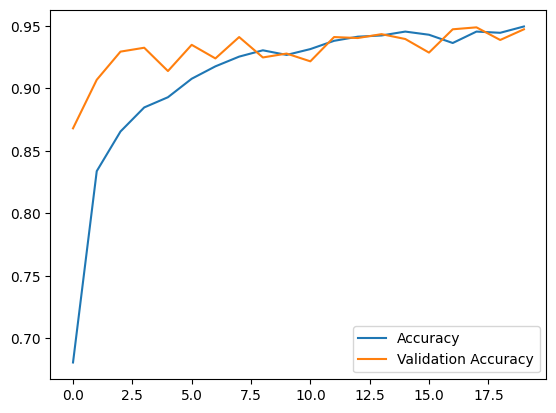

In [34]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

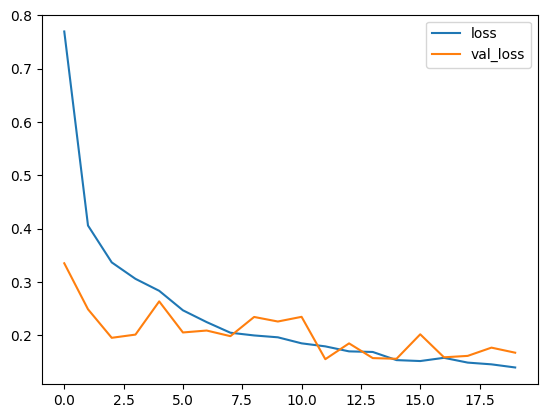

In [35]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

* Predict the image

In [36]:
def pred(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 346ms/step
[[0. 1. 0.]]


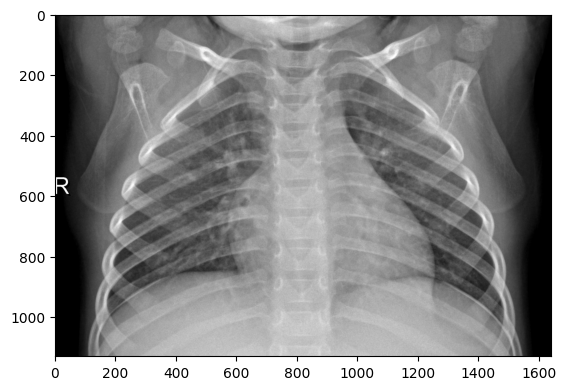

Prediction:  NORMAL


In [37]:
pred('/content/Data/test/NORMAL/NORMAL(1447).jpg')

# Transfer Learning

## Model - VGG16

In [38]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model #Functional model
from keras import applications

In [39]:
pre_trained_model=VGG16(input_shape=input_shape,include_top=False , weights="imagenet")

58889256/58889256 [==============================] - 4s 0us/step


* weights and bias are store in h5 file

* An H5 is one of the Hierarchical Data Formats (HDF) used to store large amount of data. It is used to store large amount of data in the form of multidimensional arrays.

In [40]:
for layer in pre_trained_model.layers[:15] :
  #upto 15 training
  layer.trainable=False
for layer in pre_trained_model.layers[15:] :
  #upto 15 training
  layer.trainable=True
last_layer=pre_trained_model.get_layer('block5_pool')
last_output=last_layer.output


* To summarize, this code takes a pre-trained model, freezes the first 15 layers to preserve their pre-trained weights, allows the remaining layers (after the 15th layer) to be trainable, and then retrieves the output tensor from the 'block5_pool' layer for further use in the model construction.

* get layer= get the output from the final layer

Custom layers for classification ->



In [41]:
from keras.layers import GlobalMaxPool2D


In [42]:
from keras.layers import GlobalMaxPool2D
#flatten the output layer to one dimension
x=GlobalMaxPool2D()(last_output)
#add a fully connected layer with 512 hidden units and RELU activation
x=Dense(512,activation='relu')(x)
#add dropout rate of 0.5
x=Dropout(0.5)(x)
#add final sigmoid layer for classification
x=Dense(1,activation='sigmoid')(x)

model2=Model(pre_trained_model.input,x)

In [59]:
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
training1 = model2.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)

<ipython-input-61-725d4cd30c02>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training1 = model2.fit_generator(


Epoch 1/20
161/161 [==============================] - 96s 598ms/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 2/20
161/161 [==============================] - 93s 577ms/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 3/20
161/161 [==============================] - 95s 591ms/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 4/20
161/161 [==============================] - 95s 593ms/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 5/20
161/161 [==============================] - 93s 581ms/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 6/20
161/161 [==============================] - 97s 600ms/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 7/20
161/161 [==============================] - 101s 624ms/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_a

Predict the image

In [62]:
def pred(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0.]]


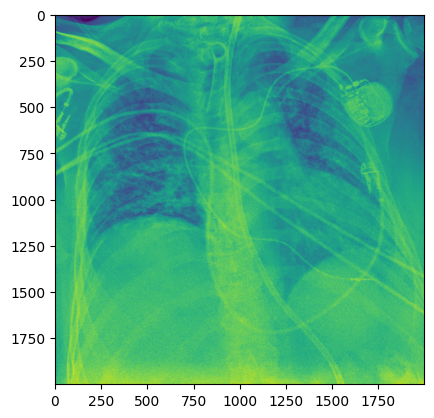

Prediction:  COVID-19


In [63]:
pred('/content/Data/train/COVID19/COVID19(112).jpg')